In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm

In [4]:
df = pd.read_csv('HRDataset.csv')

In [5]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(thresh=2,inplace=True)
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,N/A - still employed,Leave of Absence,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,N/A - still employed,Leave of Absence,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,N/A - Has not started yet,Future Start,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,N/A - still employed,Active,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0


In [7]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')

In [8]:
PerformanceScoreNum_dict = {'Fully Meets': 3,
 'Exceeds': 4,
 'Needs Improvement': 1,
 'PIP': 2}
PerformanceScoreNum_dict

{'Fully Meets': 3, 'Exceeds': 4, 'Needs Improvement': 1, 'PIP': 2}

In [9]:
df['PerformanceScoreNum'] = df['PerformanceScore'].map(PerformanceScoreNum_dict)
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,PerformanceScoreNum
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,3
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,3
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,3
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,3
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,Leave of Absence,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,3
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,Leave of Absence,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,3
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,Future Start,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,3
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,Active,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,3


In [10]:
df2 = df[['ManagerName', 'ManagerID', 'PerformanceScore', 'PerformanceScoreNum']]
df2

,ManagerName,ManagerID,PerformanceScore,PerformanceScoreNum
0,Brandon R. LeBlanc,1.0,Fully Meets,3
1,Brandon R. LeBlanc,1.0,Fully Meets,3
2,Brandon R. LeBlanc,1.0,Fully Meets,3
3,Brandon R. LeBlanc,1.0,Fully Meets,3
4,Brandon R. LeBlanc,1.0,Fully Meets,3
...,...,...,...,...
305,Peter Monroe,7.0,Fully Meets,3
306,Peter Monroe,7.0,Fully Meets,3
307,Peter Monroe,7.0,Fully Meets,3
308,Peter Monroe,7.0,Fully Meets,3


In [11]:
df2.pivot_table(values='PerformanceScoreNum',index='ManagerName',aggfunc=[np.mean])

,mean
,PerformanceScoreNum
ManagerName,
Alex Sweetwater,3.000000
Amy Dunn,2.952381
Board of Directors,3.000000
Brandon R. LeBlanc,3.000000
Brannon Miller,3.047619
Brian Champaigne,3.000000
David Stanley,2.952381
Debra Houlihan,2.333333


<AxesSubplot:ylabel='Count'>

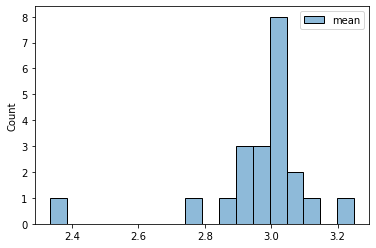

In [12]:
sns.histplot(df2.pivot_table(values='PerformanceScoreNum',index='ManagerName',aggfunc=[np.mean]))

In [13]:
print('1. Na tabeli przestawnej i wykresie powyżej widizmy, że średnie wyswione oceny różnią się w zależności od menadżera, co oznacza, że zależność pomiędzy tym, kto jest bezpośrednim przełożonym danego pracownika, a oceną wydajności pracy istnieje.') 

1. Na tabeli przestawnej i wykresie powyżej widizmy, że średnie wyswione oceny różnią się w zależności od menadżera, co oznacza, że zależność pomiędzy tym, kto jest bezpośrednim przełożonym danego pracownika, a oceną wydajności pracy istnieje.


In [14]:
def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [15]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,PerformanceScoreNum,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,3,10.916035
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,3,5.722226
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,3,4.993942
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,3,0.158799
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,3,4.408030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,IT/IS,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,3,4.878950
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,3,4.878950
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,3,3.241682
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,3,4.878950


In [16]:
df['RecruitmentSource']

0          Diversity Job Fair
1          Website Banner Ads
2             Internet Search
3      Pay Per Click - Google
4          Website Banner Ads
                ...          
305           Vendor Referral
306         Employee Referral
307      On-campus Recruiting
308         Employee Referral
309         Employee Referral
Name: RecruitmentSource, Length: 310, dtype: object

In [17]:
df.groupby('RecruitmentSource')['Seniority'].mean()

RecruitmentSource
Billboard                                 5.862886
Careerbuilder                             8.482036
Company Intranet - Partner                1.215631
Diversity Job Fair                        4.492339
Employee Referral                         5.026002
Glassdoor                                 4.155165
Indeed                                    2.676304
Information Session                       5.623661
Internet Search                           4.711482
MBTA ads                                  5.729634
Monster.com                               4.834916
Newspager/Magazine                        4.593295
On-campus Recruiting                      5.006491
On-line Web application                   0.531154
Other                                     6.453247
Pay Per Click                             0.005476
Pay Per Click - Google                    5.009457
Professional Society                      5.437757
Search Engine - Google Bing Yahoo         4.360281
Social Networ

In [18]:
print('2. Billboard')

2. Billboard


In [22]:
df[['MarriedID','EmpSatisfaction']]

,MarriedID,EmpSatisfaction
0,1.0,2.0
1,0.0,4.0
2,0.0,5.0
3,1.0,3.0
4,0.0,3.0
...,...,...
305,1.0,5.0
306,1.0,5.0
307,1.0,4.0
308,0.0,3.0


In [24]:
df.pivot_table(values='EmpSatisfaction',index='MarriedID',aggfunc=np.mean)

,EmpSatisfaction
MarriedID,
0.0,3.983957
1.0,3.747967


In [25]:
print('3. Średnio osoby w związku są mniej zadwoleni w pracy')

3. Średnio osoby w związku są mniej zadwoleni w pracy


In [37]:
def age(row):
    current_date = dt.datetime(2019,9,27)
    birth = row['DOB']
    age = (current_date - row['DOB'])/np.timedelta64(1,'Y')
    age = abs(int(age))
    return age

In [38]:
df['Age'] = df.apply(lambda row: age(row),axis=1)
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,PerformanceScoreNum,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,3,10.916035,31
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,3,5.722226,35
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,3,4.993942,33
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,3,0.158799,34
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,3,4.408030,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1.411071e+09,1.0,1.0,0.0,3.0,3.0,3.0,0.0,54.10,...,Peter Monroe,7.0,Vendor Referral,Fully Meets,1.55,5.0,8.0,3,4.878950,32
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,3,4.878950,33
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,3,3.241682,36
308,"South, Joe",1.308061e+09,0.0,0.0,1.0,1.0,3.0,3.0,0.0,53.00,...,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3.0,4.0,3,4.878950,45


<AxesSubplot:ylabel='Age'>

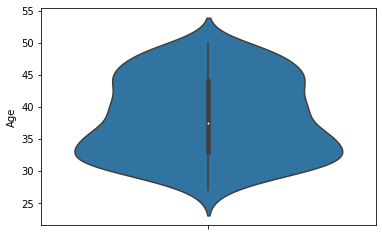

In [40]:
sns.violinplot(y='Age',data=df)

In [41]:
print('4. Struktura wieku')

4. Struktura wieku


Text(0, 0.5, 'SpecialProjectsCount')

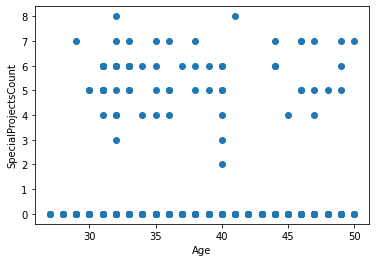

In [42]:
plt.scatter(df['Age'],df['SpecialProjectsCount'])
plt.xlabel('Age')
plt.ylabel('SpecialProjectsCount')

In [62]:
x = sm.add_constant(df['Age'])
model = sm.OLS(df['SpecialProjectsCount'],df['Age']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     SpecialProjectsCount   R-squared (uncentered):                   0.196
Model:                              OLS   Adj. R-squared (uncentered):              0.193
Method:                   Least Squares   F-statistic:                              75.12
Date:                  Wed, 02 Feb 2022   Prob (F-statistic):                    2.54e-16
Time:                          23:36:11   Log-Likelihood:                         -707.26
No. Observations:                   310   AIC:                                      1417.
Df Residuals:                       309   BIC:                                      1420.
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0302      0.003      8.667      0.000       0.023       0.037
==============================================================================
Omnibus:                       74.000   Durbin-Watson:                   0.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.648
Skew:                           1.519   Prob(JB):                     1.41e-27
Kurtosis:                       3.585   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'SpecialProjectsCount')

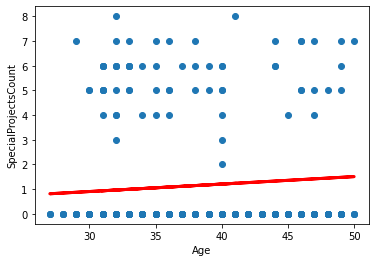

In [66]:
y_model = 0.0302*df['Age']
plt.plot(df['Age'],y_model,color='red',lw=3)
plt.scatter(df['Age'],df['SpecialProjectsCount'])
plt.xlabel('Age')
plt.ylabel('SpecialProjectsCount')

In [68]:
print('5. Starsi pracownicy pracują nad niewiele większą liczbą specjalnych projektów niż młodsi pracownicy, choć korelacja jest niewileka')

5. Starsi pracownicy pracują nad niewiele większą liczbą specjalnych projektów niż młodsi pracownicy, choć korelacja jest niewileka
